In [555]:
# Dependencies
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [556]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [557]:
# Get the measurement table columns
inspector = inspect(engine)

for entry in inspector.get_columns('Measurement'):
    print(entry['name'],entry['type'])
print('---------------------------------')
for entry in inspector.get_columns('Station'):
    print(entry['name'],entry['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
---------------------------------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [558]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [559]:
# 1. Import the sqlalchemy extract function.
from select import select
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

## Using engine.execute
engine.execute('SELECT date, tobs  FROM measurement WHERE date LIKE "%-06-%"').fetchall()
## Using session.query
session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == '06').all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [560]:
#  3. Convert the June temperatures to a list.
June_Temperatures = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == '06').all()
June_Temperatures_EE = engine.execute('SELECT date, tobs  FROM measurement WHERE date LIKE "%-06-%"').fetchall()

In [561]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_Temperature_DF = pd.DataFrame(June_Temperatures, columns=['date','temperature'])
June_Temperature_DF

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [562]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_Temperature_DF.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [563]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

## Using engine.execute
engine.execute('SELECT date, tobs  FROM measurement WHERE date LIKE "%-12-%"').fetchall()
## Using session.query
session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == '12').all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [564]:
# 7. Convert the December temperatures to a list.
December_temperatures = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == '12').all()
December_temperatures_EE = engine.execute('SELECT date, tobs  FROM measurement WHERE date LIKE "%-12-%"').fetchall()

In [565]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
December_Temperature_DF = pd.DataFrame(December_temperatures,columns=['date','temperature'])
December_Temperature_DF

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [566]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
December_Temperature_DF.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [567]:
# Get the max, min and mean temperature for each station with their name
## Using engine.execute
Temperature_per_station = engine.execute(
                '''SELECT station.name,
                    MAX(measurement.tobs),
                    MIN(measurement.tobs),
                    ROUND(AVG(measurement.tobs),1)
                FROM station 
                INNER JOIN measurement
                    ON station.station = measurement.station
                GROUP BY station.name''').fetchall()
Temperature_per_station

[('HONOLULU OBSERVATORY 702.2, HI US', 87.0, 53.0, 71.6),
 ('KANEOHE 838.1, HI US', 85.0, 59.0, 72.7),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 85.0, 58.0, 74.9),
 ('MANOA LYON ARBO 785.2, HI US', 84.0, 58.0, 70.9),
 ('PEARL CITY, HI US', 87.0, 58.0, 74.7),
 ('UPPER WAHIAWA 874.3, HI US', 83.0, 58.0, 72.7),
 ('WAIHEE 837.5, HI US', 85.0, 54.0, 71.7),
 ('WAIKIKI 717.2, HI US', 87.0, 56.0, 74.6),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 85.0, 56.0, 74.5)]

In [568]:
# Transform the queried data in to a DataFrame with the appropriate column names
Temperature_per_station_DF = pd.DataFrame(Temperature_per_station,columns=["Station Name","Max Temperature","Min Temperature", "Average Temperature"])

# Clean the station name to make it clearer
Temperature_per_station_DF['Station Name'] = Temperature_per_station_DF['Station Name'].str.extract('([a-zA-Z ]*)')

# Print the finished DataFrame
Temperature_per_station_DF

,Station Name,Max Temperature,Min Temperature,Average Temperature
0,HONOLULU OBSERVATORY,87.0,53.0,71.6
1,KANEOHE,85.0,59.0,72.7
2,KUALOA RANCH HEADQUARTERS,85.0,58.0,74.9
3,MANOA LYON ARBO,84.0,58.0,70.9
4,PEARL CITY,87.0,58.0,74.7
5,UPPER WAHIAWA,83.0,58.0,72.7
6,WAIHEE,85.0,54.0,71.7
7,WAIKIKI,87.0,56.0,74.6
8,WAIMANALO EXPERIMENTAL FARM,85.0,56.0,74.5


In [569]:
# Get the max, min and mean precipitation for each station with their name
## Using engine.execute
Precipitation_per_station = engine.execute(
                '''SELECT station.name,
                    MAX(measurement.prcp),
                    MIN(measurement.prcp),
                    ROUND(AVG(measurement.prcp),1)
                FROM station 
                INNER JOIN measurement
                    ON station.station = measurement.station
                GROUP BY station.name''').fetchall()
Precipitation_per_station

[('HONOLULU OBSERVATORY 702.2, HI US', 4.0, 0.0, 0.0),
 ('KANEOHE 838.1, HI US', 7.65, 0.0, 0.1),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 11.53, 0.0, 0.1),
 ('MANOA LYON ARBO 785.2, HI US', 8.06, 0.0, 0.4),
 ('PEARL CITY, HI US', 2.8, 0.0, 0.1),
 ('UPPER WAHIAWA 874.3, HI US', 6.3, 0.0, 0.2),
 ('WAIHEE 837.5, HI US', 9.64, 0.0, 0.2),
 ('WAIKIKI 717.2, HI US', 4.2, 0.0, 0.0),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 6.38, 0.0, 0.1)]

In [570]:
# Transform the queried data in to a DataFrame with the appropriate column names
Precipitation_per_station_DF = pd.DataFrame(Precipitation_per_station,columns=["Station Name","Max Precipitation","Min Precipitation", "Average Precipitation"])

# Clean the station name to make it clearer
Precipitation_per_station_DF['Station Name'] = Precipitation_per_station_DF['Station Name'].str.extract('([a-zA-Z ]*)')

# Print the finished DataFrame
Precipitation_per_station_DF

,Station Name,Max Precipitation,Min Precipitation,Average Precipitation
0,HONOLULU OBSERVATORY,4.00,0.0,0.0
1,KANEOHE,7.65,0.0,0.1
2,KUALOA RANCH HEADQUARTERS,11.53,0.0,0.1
3,MANOA LYON ARBO,8.06,0.0,0.4
4,PEARL CITY,2.80,0.0,0.1
5,UPPER WAHIAWA,6.30,0.0,0.2
6,WAIHEE,9.64,0.0,0.2
7,WAIKIKI,4.20,0.0,0.0
8,WAIMANALO EXPERIMENTAL FARM,6.38,0.0,0.1


In [571]:
# Get all the temperature records in a single query
Historical_temperature = engine.execute(
                '''SELECT station.name,
                    measurement.date,
                    measurement.tobs
                FROM station 
                INNER JOIN measurement
                    ON station.station = measurement.station
                ''').fetchall()
Historical_temperature

[('WAIKIKI 717.2, HI US', '2010-01-01', 65.0),
 ('WAIKIKI 717.2, HI US', '2010-01-02', 63.0),
 ('WAIKIKI 717.2, HI US', '2010-01-03', 74.0),
 ('WAIKIKI 717.2, HI US', '2010-01-04', 76.0),
 ('WAIKIKI 717.2, HI US', '2010-01-06', 73.0),
 ('WAIKIKI 717.2, HI US', '2010-01-07', 70.0),
 ('WAIKIKI 717.2, HI US', '2010-01-08', 64.0),
 ('WAIKIKI 717.2, HI US', '2010-01-09', 68.0),
 ('WAIKIKI 717.2, HI US', '2010-01-10', 73.0),
 ('WAIKIKI 717.2, HI US', '2010-01-11', 64.0),
 ('WAIKIKI 717.2, HI US', '2010-01-12', 61.0),
 ('WAIKIKI 717.2, HI US', '2010-01-14', 66.0),
 ('WAIKIKI 717.2, HI US', '2010-01-15', 65.0),
 ('WAIKIKI 717.2, HI US', '2010-01-16', 68.0),
 ('WAIKIKI 717.2, HI US', '2010-01-17', 64.0),
 ('WAIKIKI 717.2, HI US', '2010-01-18', 72.0),
 ('WAIKIKI 717.2, HI US', '2010-01-19', 66.0),
 ('WAIKIKI 717.2, HI US', '2010-01-20', 66.0),
 ('WAIKIKI 717.2, HI US', '2010-01-21', 69.0),
 ('WAIKIKI 717.2, HI US', '2010-01-22', 67.0),
 ('WAIKIKI 717.2, HI US', '2010-01-23', 67.0),
 ('WAIKIKI 71

In [572]:
# Create dataframe with historical temperature data
Historical_temperature_DF = pd.DataFrame(Historical_temperature, columns=["Station Name", "Date", "Temperature"])
Historical_temperature_DF

,Station Name,Date,Temperature
0,"WAIKIKI 717.2, HI US",2010-01-01,65.0
1,"WAIKIKI 717.2, HI US",2010-01-02,63.0
2,"WAIKIKI 717.2, HI US",2010-01-03,74.0
3,"WAIKIKI 717.2, HI US",2010-01-04,76.0
4,"WAIKIKI 717.2, HI US",2010-01-06,73.0
...,...,...,...
19545,"MANOA LYON ARBO 785.2, HI US",2017-08-19,71.0
19546,"MANOA LYON ARBO 785.2, HI US",2017-08-20,78.0
19547,"MANOA LYON ARBO 785.2, HI US",2017-08-21,76.0
19548,"MANOA LYON ARBO 785.2, HI US",2017-08-22,76.0


In [573]:
# Clean the station name

Historical_temperature_DF['Station Name'] = Historical_temperature_DF['Station Name'].str.extract('([a-zA-Z ]*)')
Historical_temperature_DF['Station Name'] = Historical_temperature_DF['Station Name'].apply(lambda x : x.strip())

# Split the Date Column into 2 columns, year and month
Historical_temperature_DF['Year'] = Historical_temperature_DF['Date'].str.extract('([0-9]{4})')

Historical_temperature_DF['Month'] = Historical_temperature_DF['Date'].str.extract('[0-9]{4}.([0-9]{2})')

In [574]:
# Reorganize Columns and drop the date column
Historical_temperature_DF = Historical_temperature_DF[["Station Name", "Year", "Month", "Temperature"]]

# Change month number into month short notation name
Historical_temperature_DF.loc[:,'Month'] = Historical_temperature_DF['Month'].astype(int).apply(lambda x : calendar.month_abbr[x])

Historical_temperature_DF

c:\Users\Daniel\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Station Name,Year,Month,Temperature
0,WAIKIKI,2010,Jan,65.0
1,WAIKIKI,2010,Jan,63.0
2,WAIKIKI,2010,Jan,74.0
3,WAIKIKI,2010,Jan,76.0
4,WAIKIKI,2010,Jan,73.0
...,...,...,...,...
19545,MANOA LYON ARBO,2017,Aug,71.0
19546,MANOA LYON ARBO,2017,Aug,78.0
19547,MANOA LYON ARBO,2017,Aug,76.0
19548,MANOA LYON ARBO,2017,Aug,76.0


c:\Users\Daniel\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\Daniel\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


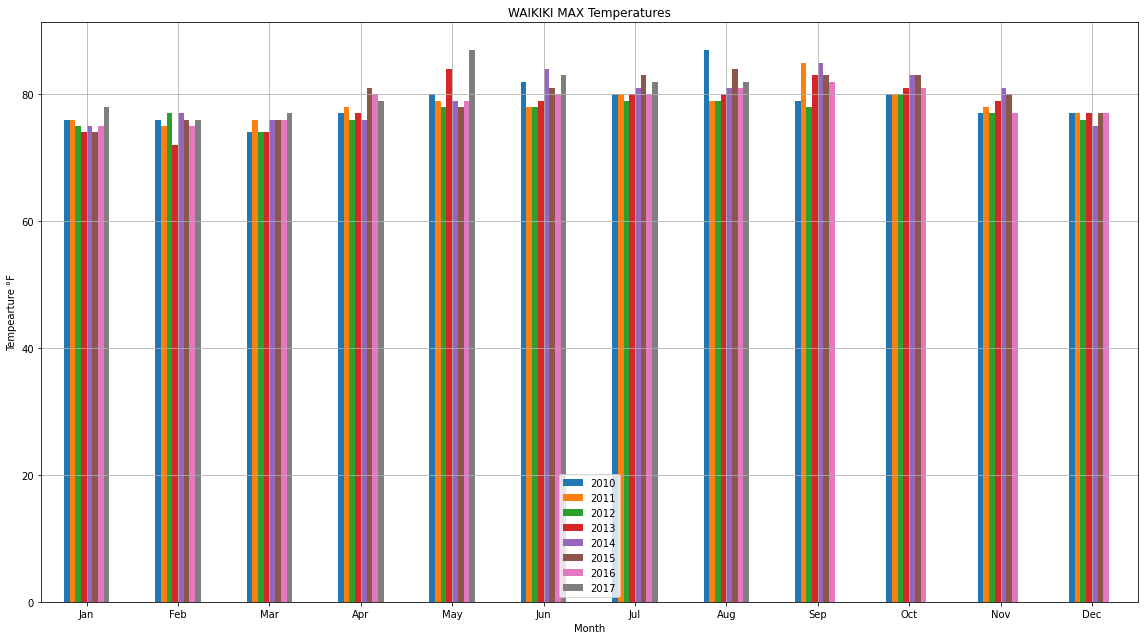

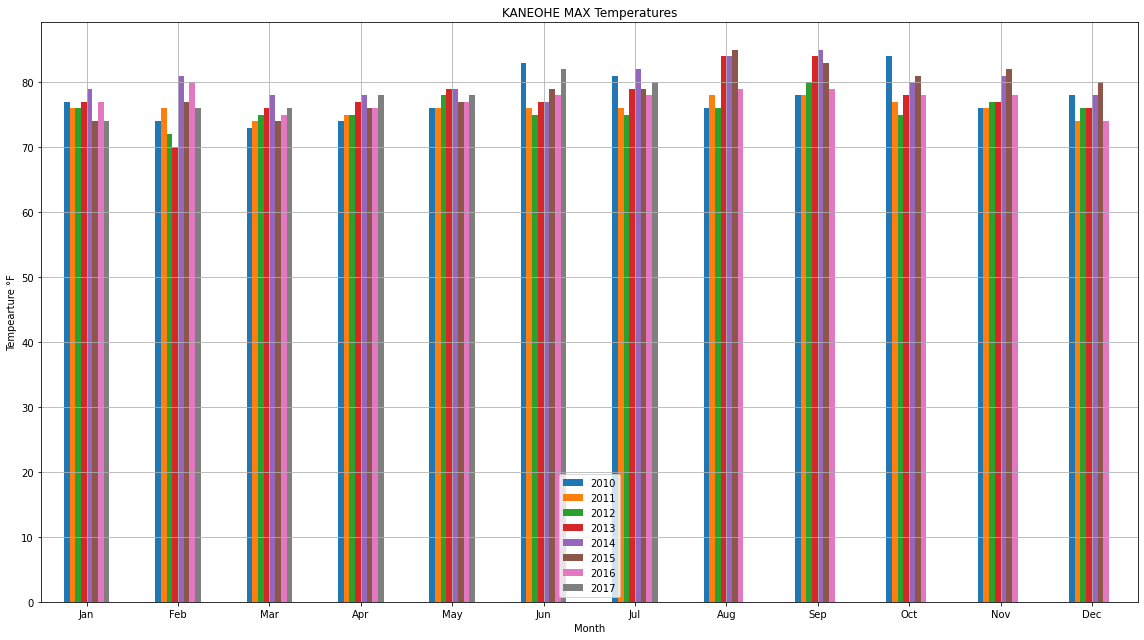

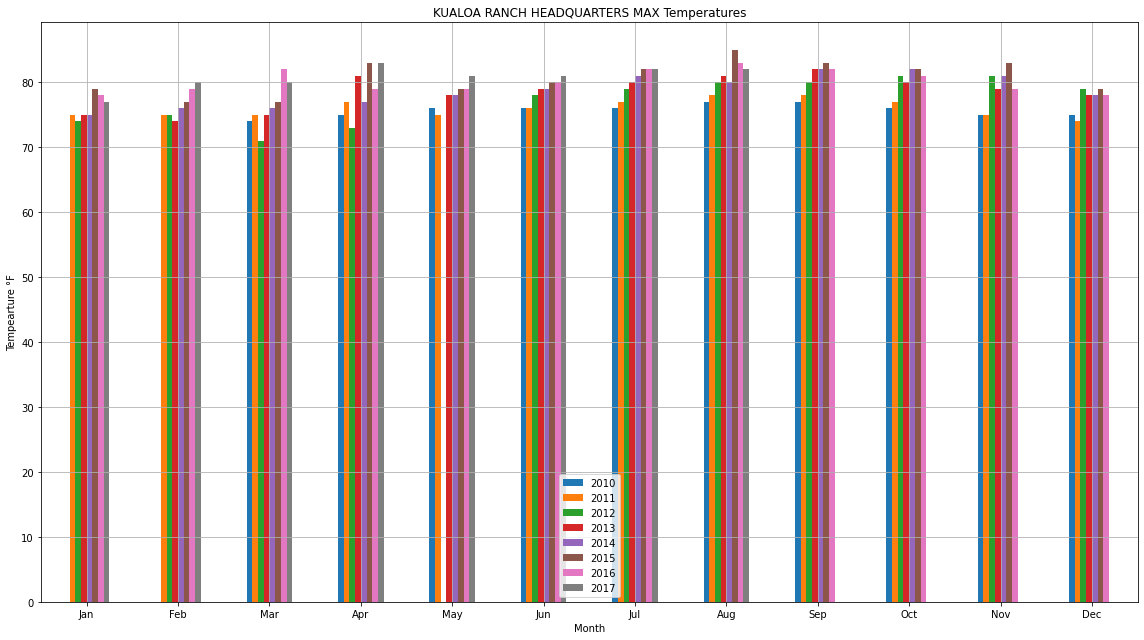

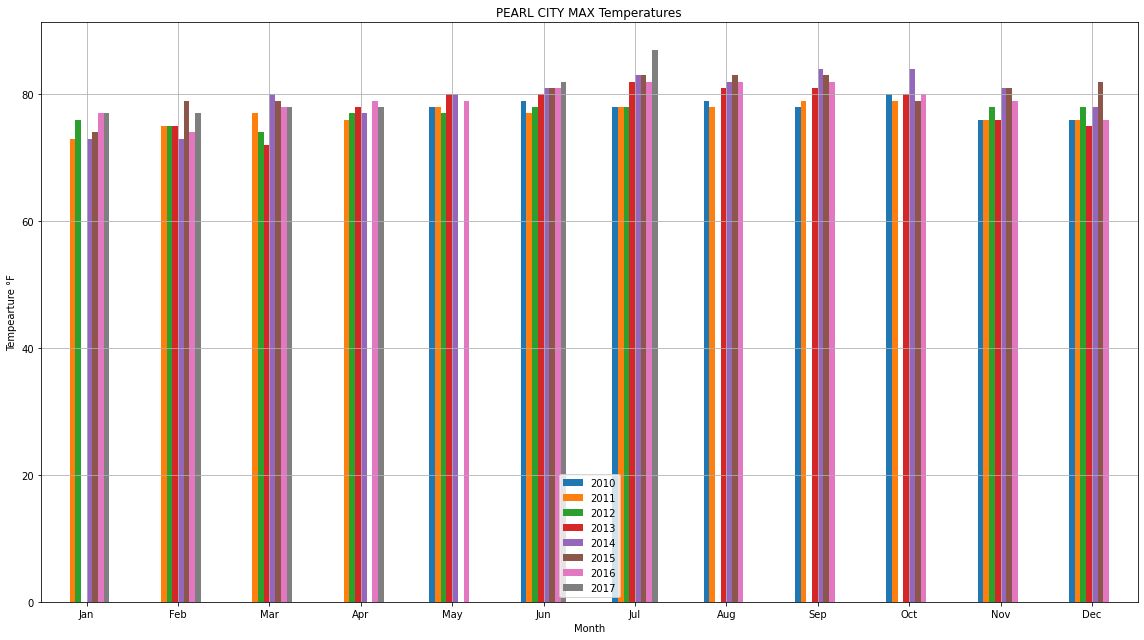

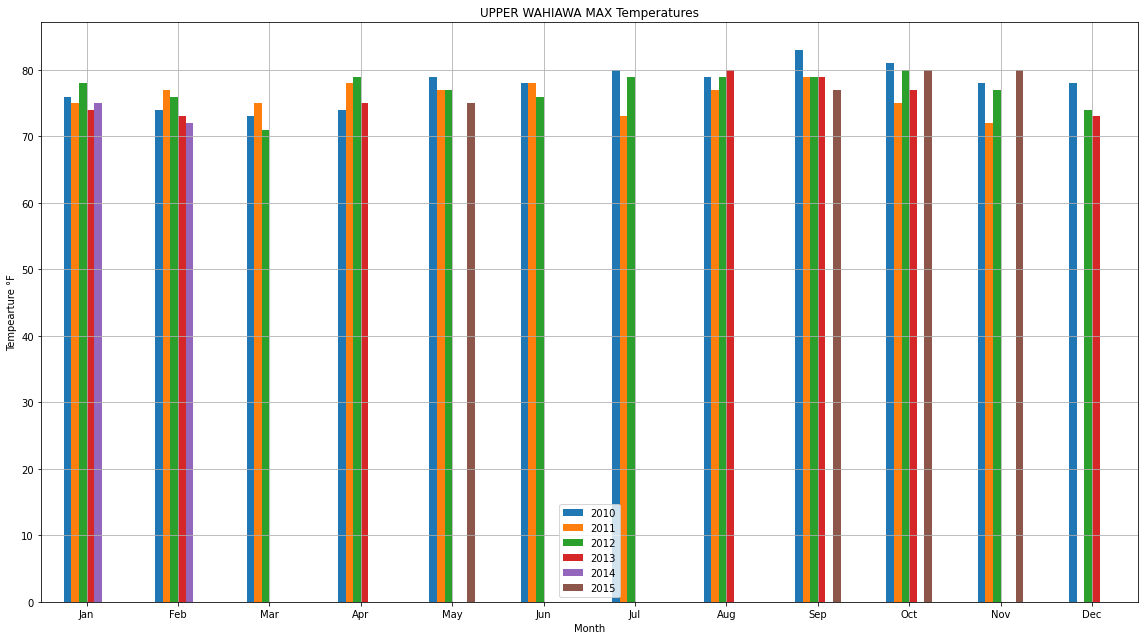

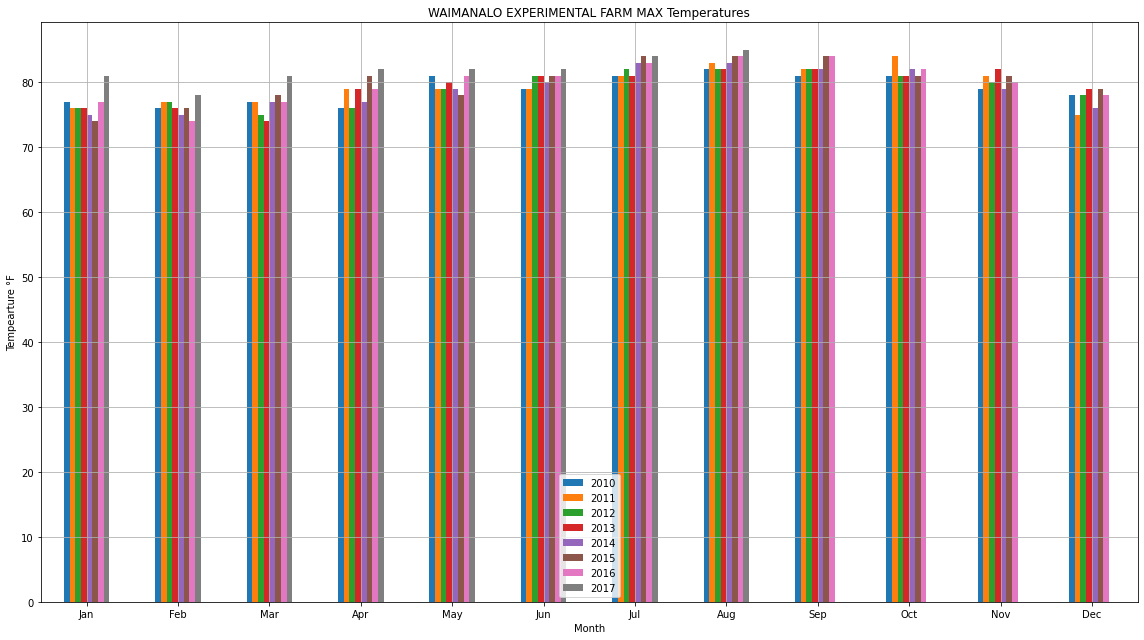

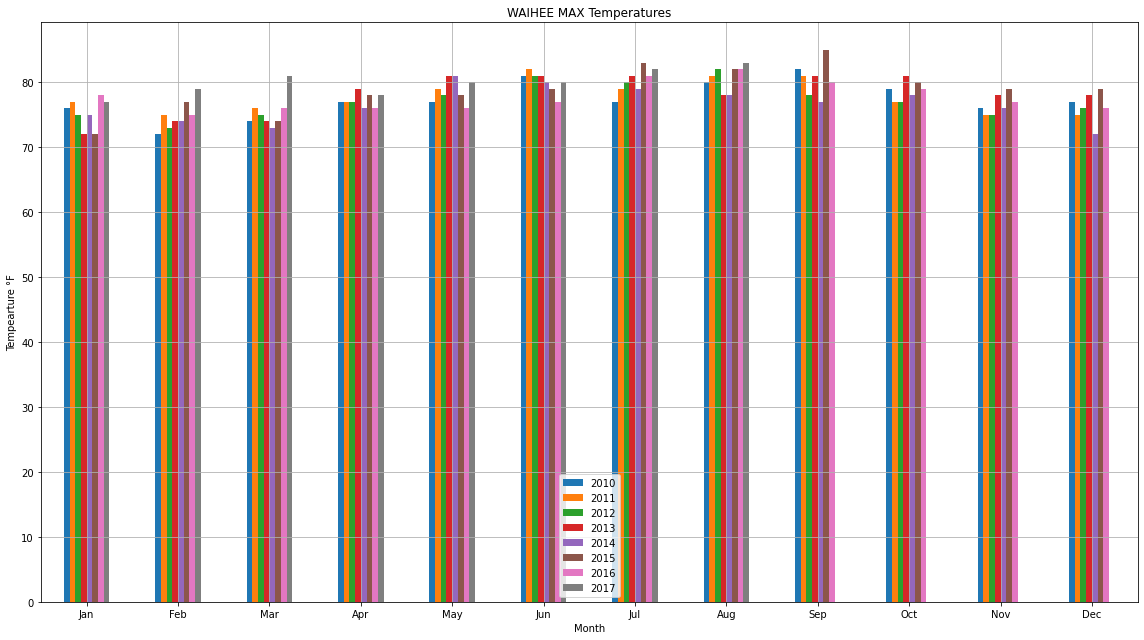

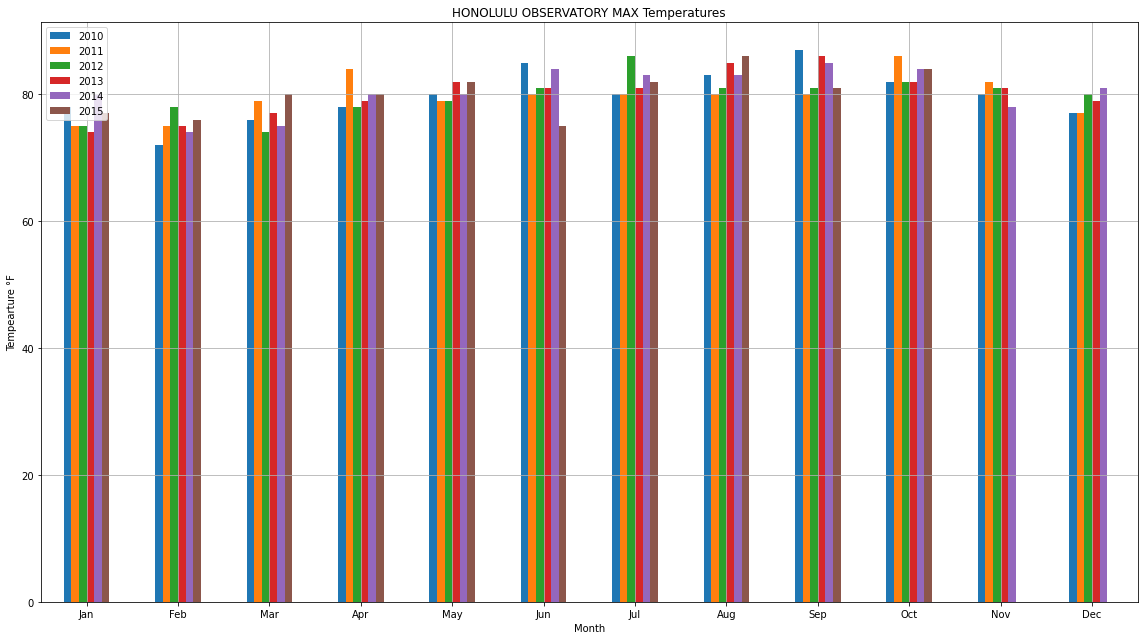

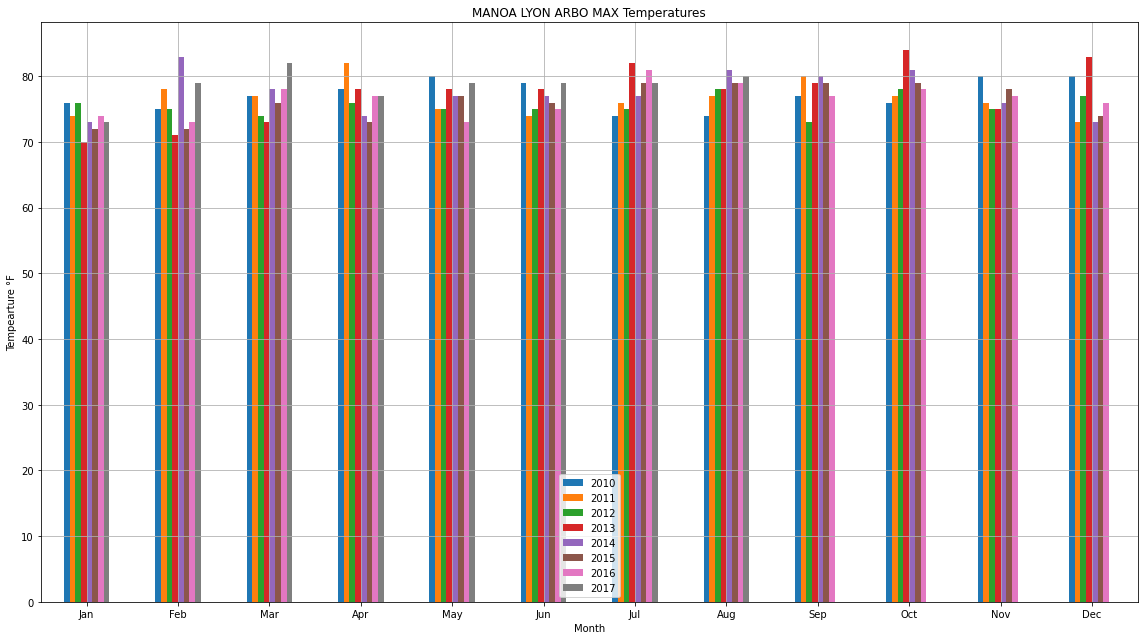

In [575]:
months = Historical_temperature_DF['Month'].unique()

# Create plots for each station and year individually (i.e. WAIKIKI 2010 has its own plot with its 12 months at the x axis)

#for Sta_Name in Historical_temperature_DF['Station Name'].unique():
    #for Year in Historical_temperature_DF.loc[(Historical_temperature_DF['Station Name'] == Sta_Name)]['Year'].unique():
        #Historical_temperature_DF.loc[(Historical_temperature_DF['Station Name'] == Sta_Name) & (Historical_temperature_DF['Year'] == Year)][['Month','Temperature']].groupby('Month').max().reindex(months).plot(
            #kind = 'line',
            #figsize = (16,9),
            #title = f'{Sta_Name} MAX temperatures for {Year}',
            #grid = True,
            #xlabel = 'Month',
            #ylabel = 'Tempearture °F'
        #)        
        #plt.tight_layout()


# Create plots for the max temperature at each station with all their years
for Sta_Name in Historical_temperature_DF['Station Name'].unique():
    station_df = pd.DataFrame()
    station_df = Historical_temperature_DF.loc[(Historical_temperature_DF['Station Name'] == Sta_Name)]
    for year in station_df['Year'].unique():
        station_df[year] = station_df.loc[(station_df['Year'] == year)]['Temperature']

    station_df.drop(['Year','Temperature','Station Name'],axis = 1,inplace=True)
    station_df.groupby('Month').max().reindex(months).plot(
                kind = 'bar',
                figsize = (16,9),
                title = f'{Sta_Name} MAX Temperatures',
                grid = True,
                xlabel = 'Month',
                ylabel = 'Tempearture °F',
                rot = 0 
    )
    plt.tight_layout()


c:\Users\Daniel\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


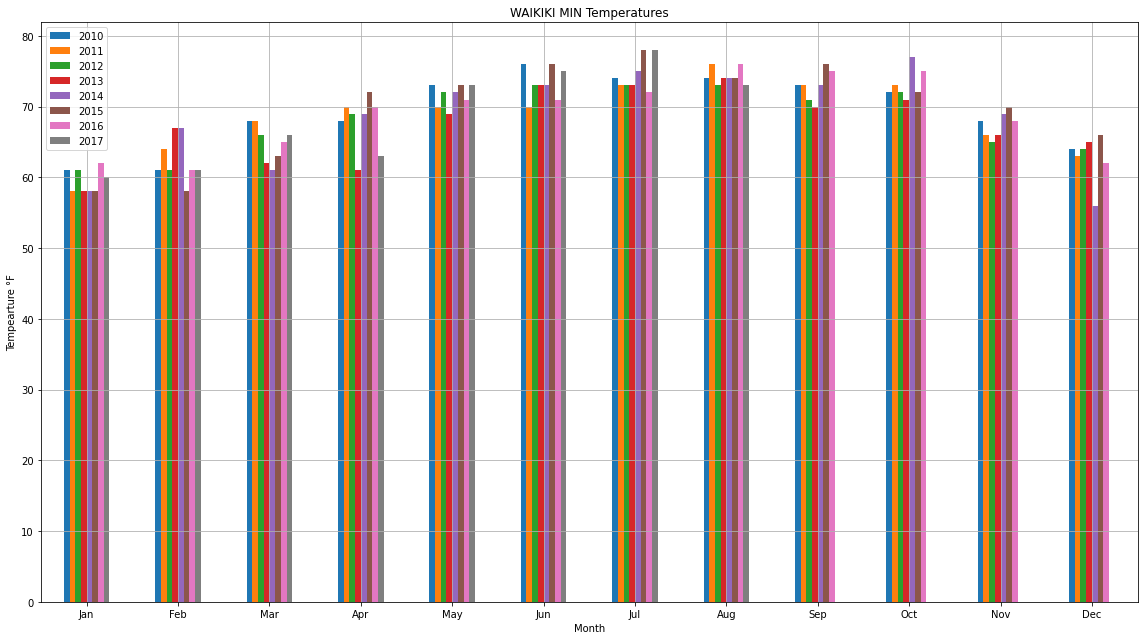

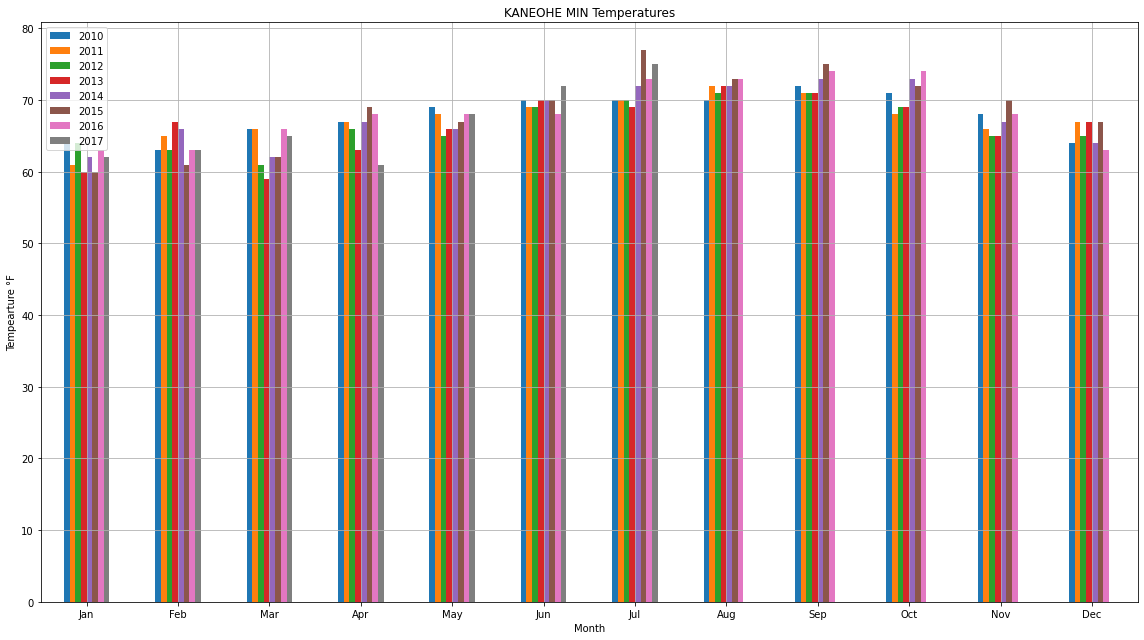

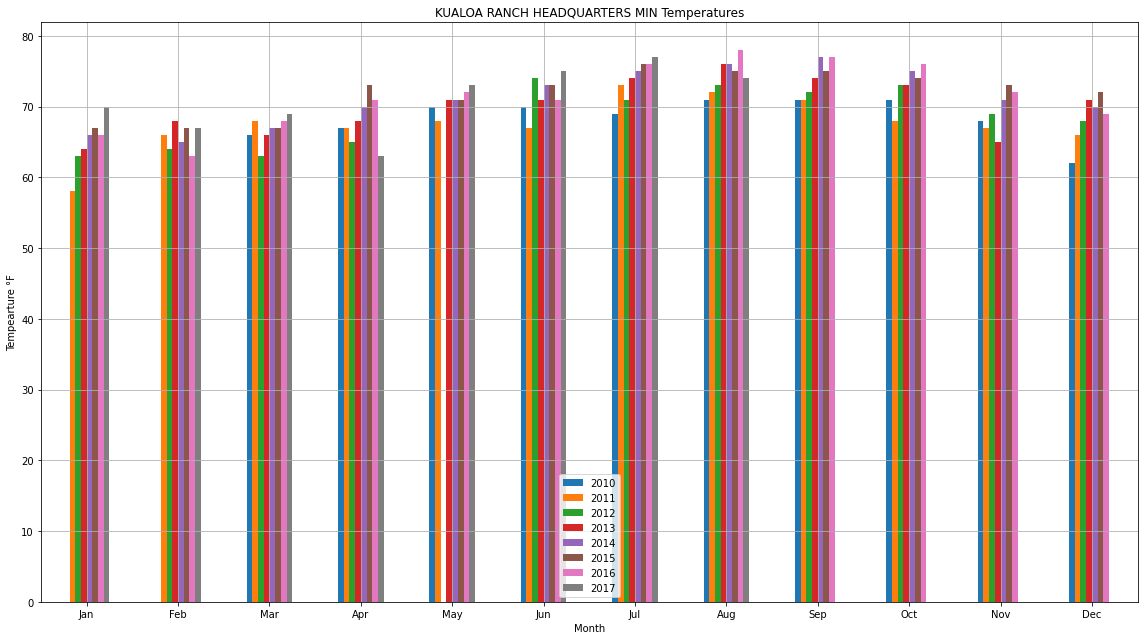

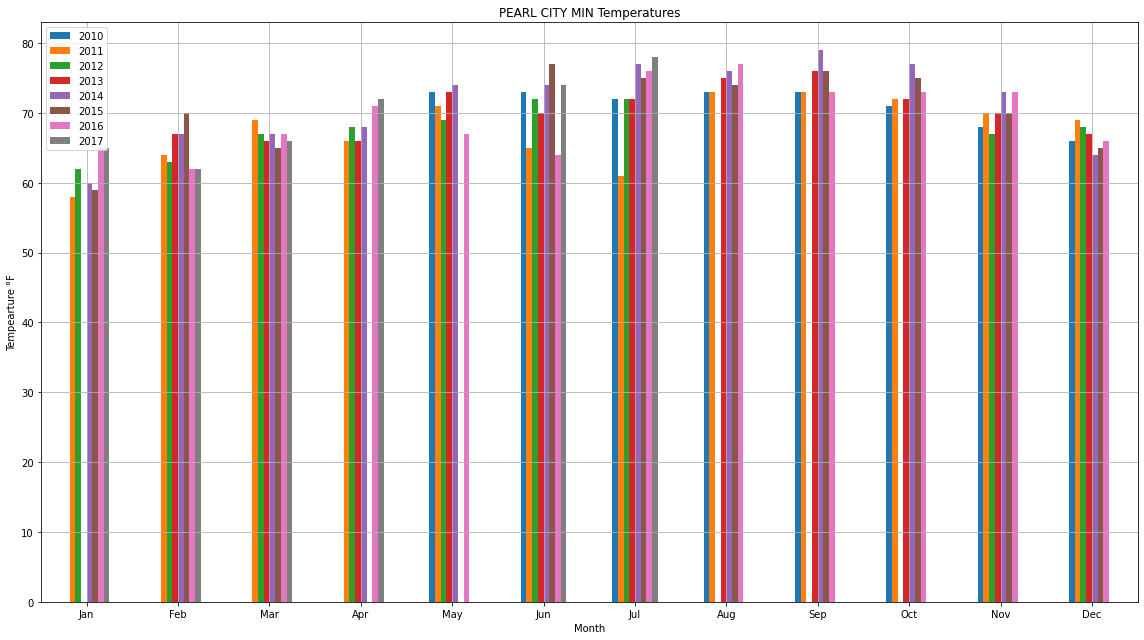

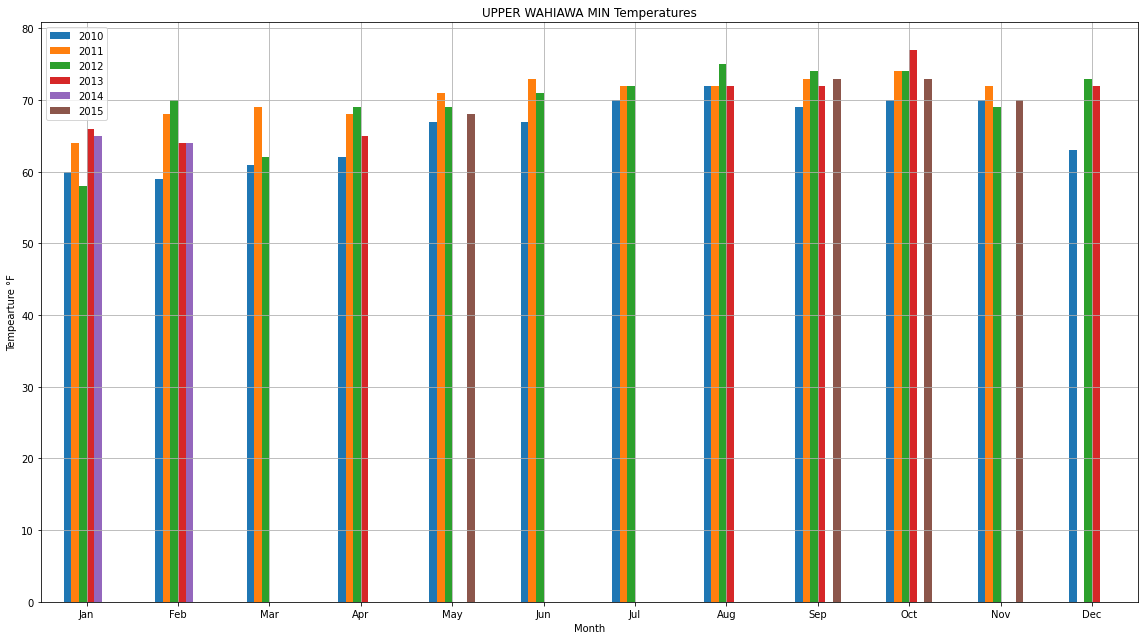

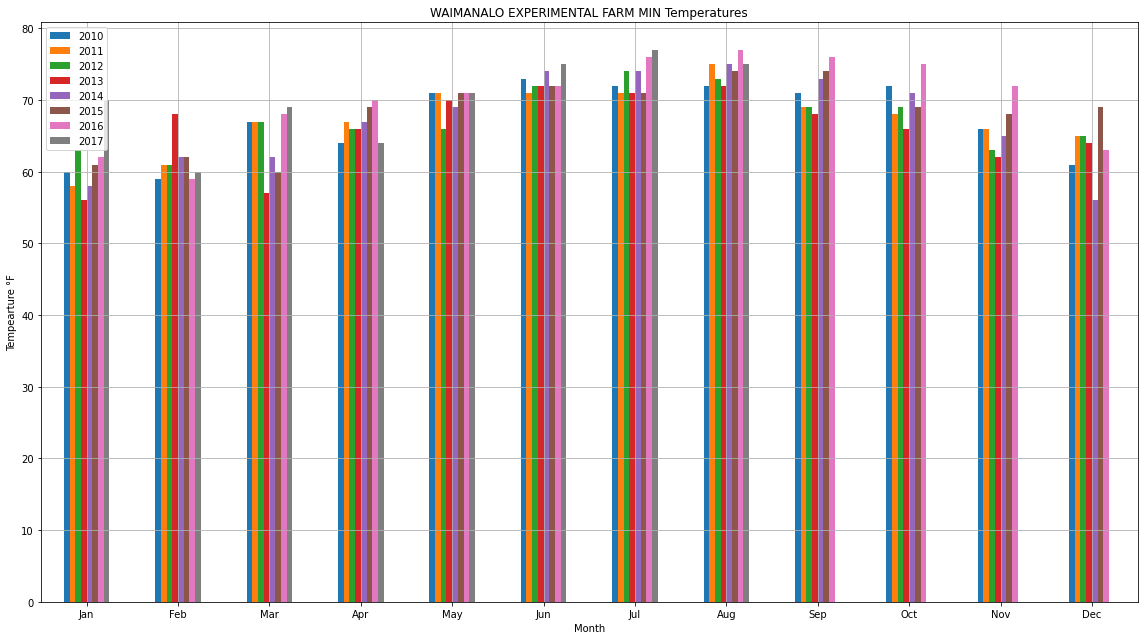

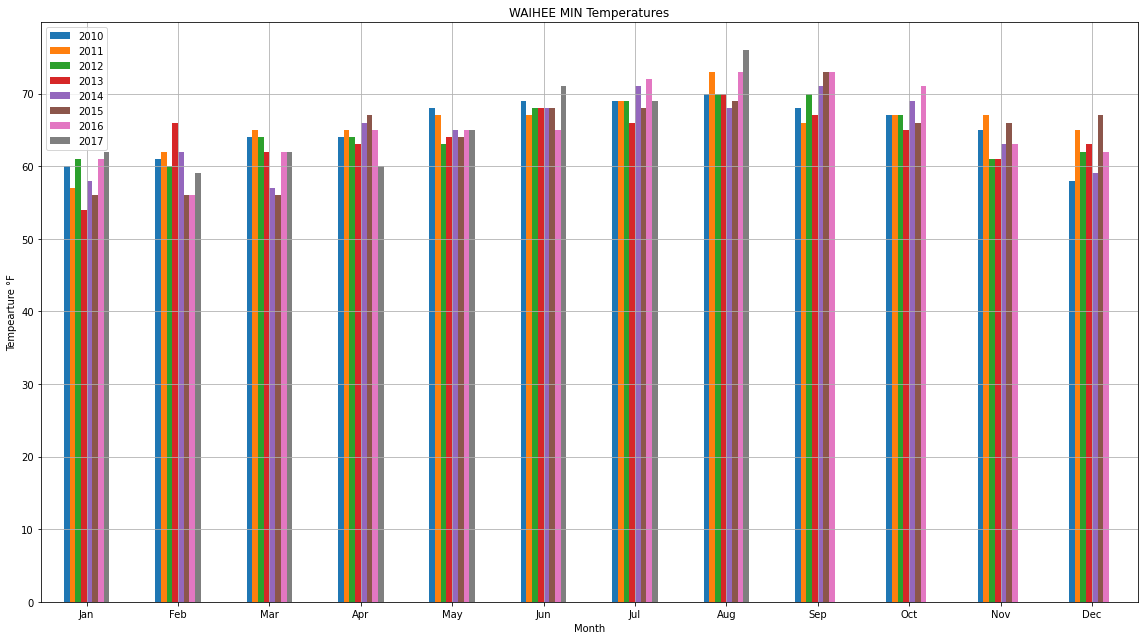

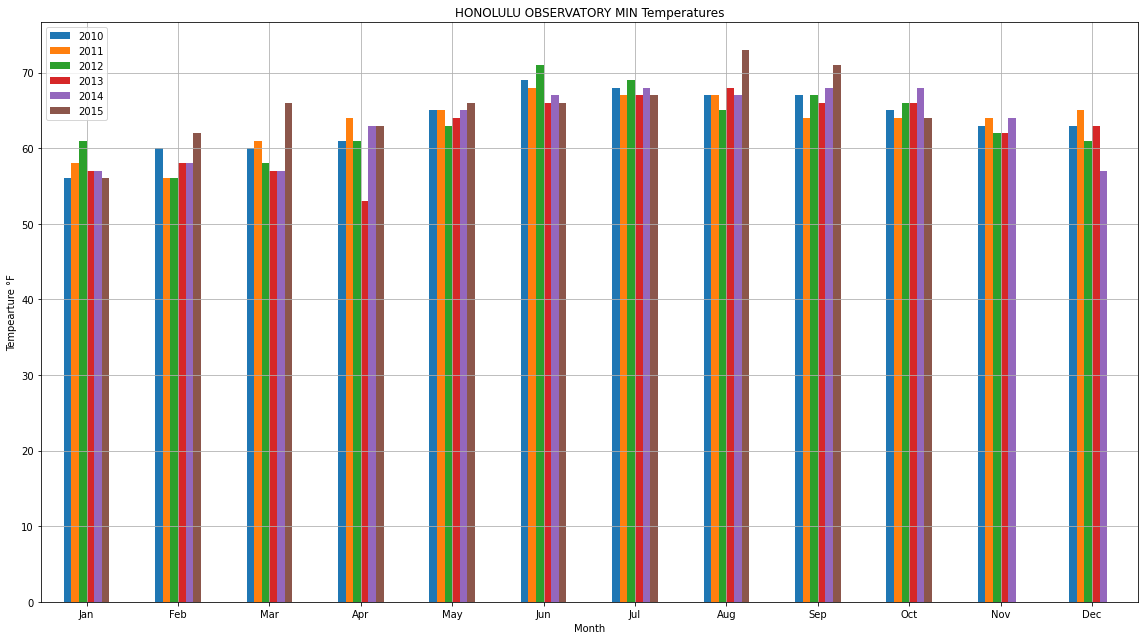

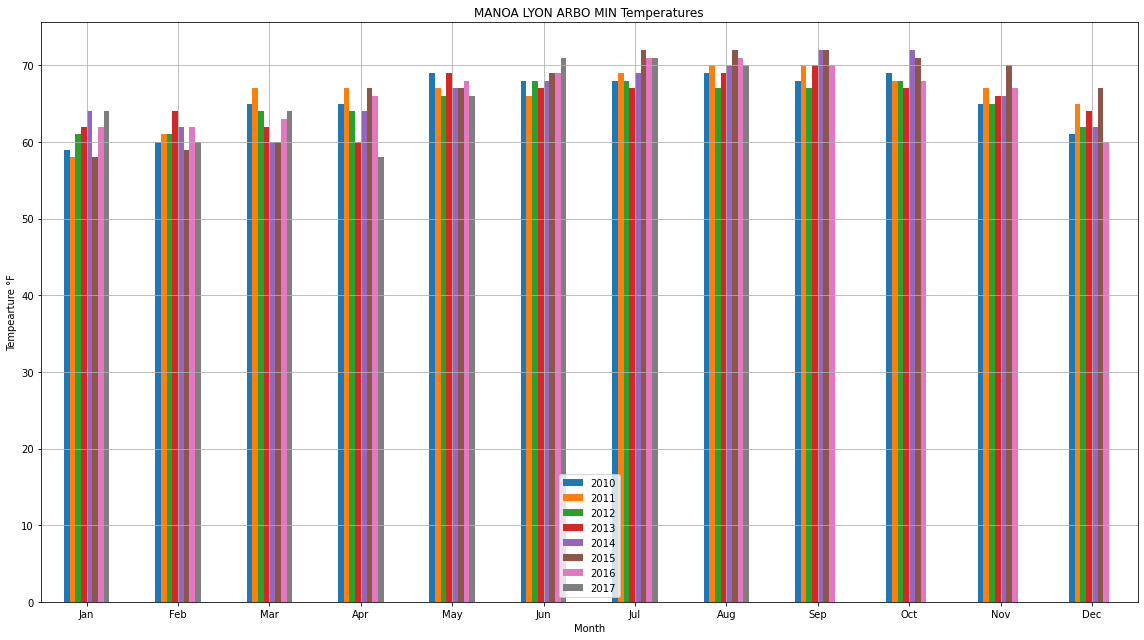

In [576]:
months = Historical_temperature_DF['Month'].unique()

# Create plots for the min temperature at each station with all their years
for Sta_Name in Historical_temperature_DF['Station Name'].unique():
    station_df = pd.DataFrame()
    station_df = Historical_temperature_DF.loc[(Historical_temperature_DF['Station Name'] == Sta_Name)]
    for year in station_df['Year'].unique():
        station_df[year] = station_df.loc[(station_df['Year'] == year)]['Temperature']

    station_df.drop(['Year','Temperature','Station Name'],axis = 1,inplace=True)
    station_df.groupby('Month').min().reindex(months).plot(
                kind = 'bar',
                figsize = (16,9),
                title = f'{Sta_Name} MIN Temperatures',
                grid = True,
                xlabel = 'Month',
                ylabel = 'Tempearture °F',
                rot = 0 
    )
    plt.tight_layout()
